Dados iniciais:
    ano estado  area_plantada_ha  produtividade_kg_ha  producao_ton
0  2019     PR           5000000                 3400      17000000
1  2019     MT          10000000                 3100      31000000
2  2019     RS           6000000                 3000      18000000
3  2020     PR           5200000                 3500      18200000
4  2020     MT          10200000                 3150      32130000

Avaliação do modelo:
MAE (Erro Absoluto Médio): 143775.65684621283
R² Score: 0.9992902192251338


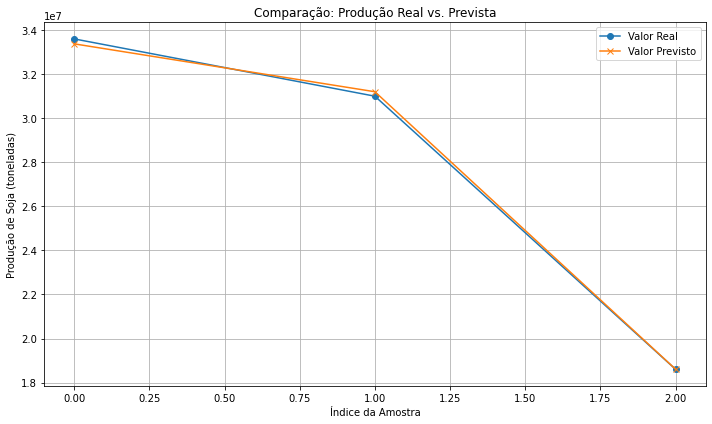

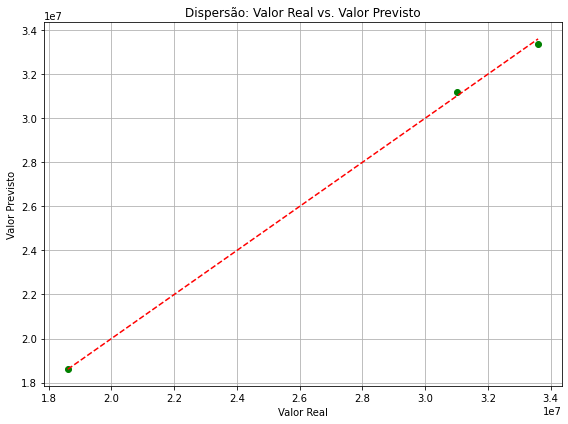

In [12]:
# Prever a produção total de soja (em toneladas) com base na área plantada e 
# produtividade média

# 1. Importações
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# 2. Leitura dos dados
df = pd.read_csv("dados_soja.csv")

# 3. Ver os dados
print("Dados iniciais:")
print(df.head())

# 4. Pré-processamento
df = pd.get_dummies(df, columns=["estado"], drop_first=True)

# 5. Separar features e target
X = df.drop("producao_ton", axis=1)
y = df["producao_ton"]

# 6. Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 7. Criar o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# 8. Fazer previsões
y_pred = modelo.predict(X_test)

# 9. Avaliação do modelo
print("\nAvaliação do modelo:")
print("MAE (Erro Absoluto Médio):", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# 10. Gráfico de linha: Real vs Previsto
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Valor Real", marker='o')
plt.plot(y_pred, label="Valor Previsto", marker='x')
plt.title("Comparação: Produção Real vs. Prevista")
plt.xlabel("Índice da Amostra")
plt.ylabel("Produção de Soja (toneladas)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 11. Gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valor Real")
plt.ylabel("Valor Previsto")
plt.title("Dispersão: Valor Real vs. Valor Previsto")
plt.grid(True)
plt.tight_layout()
plt.show()
